# **TASK 4**

# **Email spam Detection with Machine Learning**

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Load Dataset
df = pd.read_csv('/content/spam.csv', encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#Rename columns for better clarity
df.rename(columns={'v1': 'label', 'v2': 'email_content'}, inplace=True)

<ipython-input-6-db1cfbe9d0db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


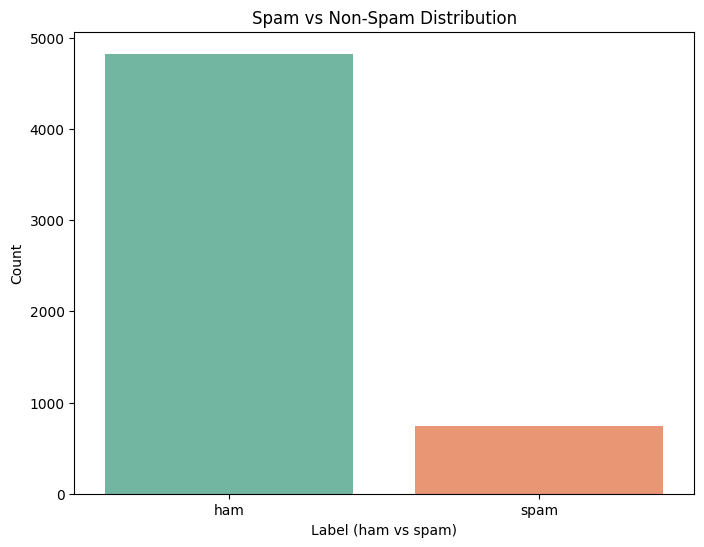

In [6]:
#Exploratory Data Analysis (EDA)
#Check the distribution of the target variable (spam vs ham)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Spam vs Non-Spam Distribution')
plt.xlabel('Label (ham vs spam)')
plt.ylabel('Count')
plt.show()

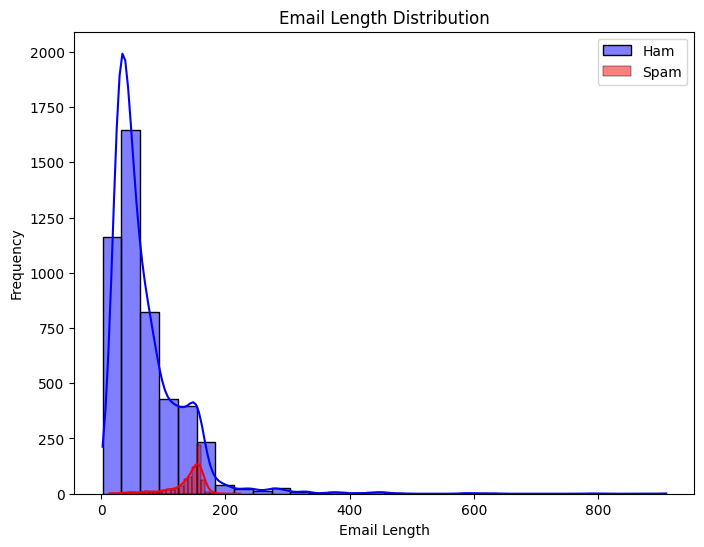

In [7]:
#Email length distribution
df['email_length'] = df['email_content'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df[df['label'] == 'ham']['email_length'], color='blue', kde=True, label='Ham', bins=30)
sns.histplot(df[df['label'] == 'spam']['email_length'], color='red', kde=True, label='Spam', bins=30)
plt.title('Email Length Distribution')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [8]:
#Most frequent words in spam and ham emails (word clouds)
spam_text = ' '.join(df[df['label'] == 'spam']['email_content'])
ham_text = ' '.join(df[df['label'] == 'ham']['email_content'])

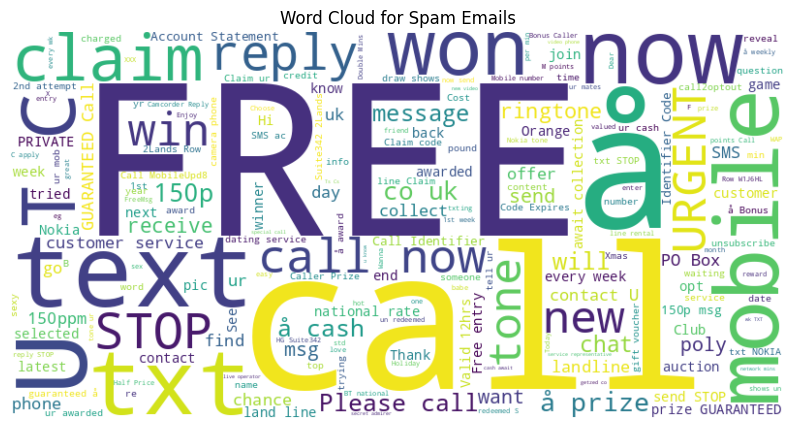

In [9]:
# Word Cloud for Spam Emails
plt.figure(figsize=(10, 8))
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')
plt.show()

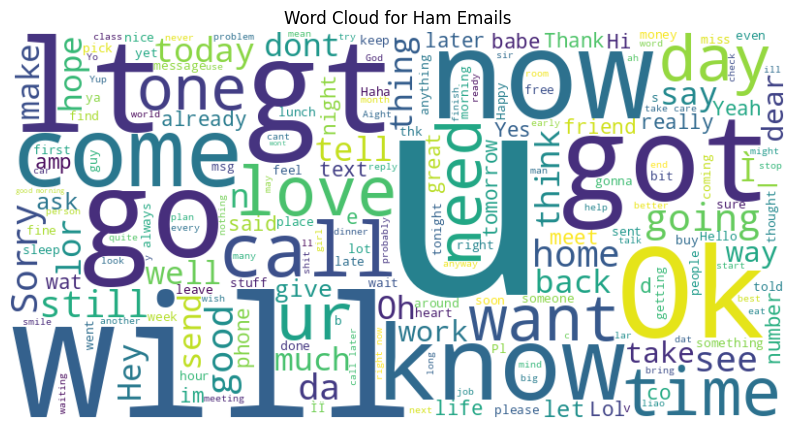

In [10]:
# Word Cloud for Ham Emails
plt.figure(figsize=(10, 8))
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Emails')
plt.axis('off')
plt.show()

In [11]:
#Feature Engineering
#Add features like word count and character count
df['word_count'] = df['email_content'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['email_content'].apply(len)

In [12]:
#Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['email_content'])
y = df['label']

In [13]:
# Combine original features with TF-IDF features
X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
X = pd.concat([df[['email_length', 'word_count', 'char_count']], X], axis=1)

In [14]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [16]:
#Make predictions and evaluate
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.8681614349775785
Classification Report: 
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       965
        spam       1.00      0.02      0.04       150

    accuracy                           0.87      1115
   macro avg       0.93      0.51      0.48      1115
weighted avg       0.89      0.87      0.81      1115

